In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def clean_and_drop(df):
    # 只篩選有包含 '住' 用途的交易案
    df = df.loc[df['Main_Usage_Living'] == 1]
    df = df.drop(columns=['Main_Usage_Living'])

    # 因為都是 0
    df = df.drop(columns=['Non_City_Land_Usage', 'Main_Usage_Walk',
                          'Main_Usage_Selling',
                          'Main_Usage_SnE'])

    # 只有 344 筆是包含工廠用途，且都不具住宅用途，故剔除
    df = df.loc[df['Main_Usage_Manufacturing'] == 0]
    df = df.drop(columns=['Main_Usage_Manufacturing'])

    # 只有 76 筆是包含停車用途，且都不具住宅用途，故剔除
    df = df.loc[df['Main_Usage_Parking'] == 0]
    df = df.drop(columns=['Main_Usage_Parking'])

    # 只有 78 筆有農業用途，且都不具住宅用途，故剔除
    df = df.loc[df['Main_Usage_Farm'] == 0]
    df = df.drop(columns=['Main_Usage_Farm'])

    # NOTICE: 我沒有錢，所以我先只買 6 房以下的
    df = df.loc[df['room'] < 6]

    df = df.loc[df['trading_floors_count'] == 1]

    # 雖然有 95 個樣本包含地下室，但是樣本太少，可能不足以推廣
    # 所以先剔除，剔除完後，都是 0 所以直接 drop
    df = df.loc[df['including_basement'] == 0]
    df = df.drop(columns=['including_basement'])

    # 所有的樣本都不包含人行道，所以直接去除這個 feature
    df = df.drop(columns=['including_arcade'])

    # 剔除交易樓層高度是 -1 (原本有一個樣本)
    df = df.loc[df['min_floors_height'] != -1]

    # 剔除交易建物是 0 個樓層的情況
    df = df.loc[df['building_total_floors'] != 0]

    # 因為車位交易 50 坪以上的資料只有 22 筆，所以先去除
    # 因為浮點數在硬體儲存會有小數點，故不能直接用 == 50.0 去比較
    df = df.loc[df['Parking_Area'] < 49.5]

    # 把農舍，廠辦踢掉
    df = df.loc[df['Building_Types'] < 8]

    # 把超大轉移坪數刪掉
    df = df.loc[df['Transfer_Total_Ping'] < 150]

    # Transaction_Land == 0 只有 5 筆
    df = df.loc[df['Transaction_Land'] != 0]

    # 只取交易一個建物的案子
    df = df.loc[df['Transaction_Building'] == 1]

    # 交易車位數 > 3 只有 98 個案例，比較少，故去除
    df = df.loc[df['Transaction_Parking'] <= 3]

    # 目前不特別區分備註欄位是不是空的，因為用 one-hot encoding
    # 處理了，所以 Note_<tag> 不是全部都是 0 就代表有備註的項目
    df = df.drop(columns=['Note_Null'])

    # 去除政府承購, 去除後在 future data 中皆為 0
    df = df.loc[df['Note_Gov'] == 0]
    df = df.drop(columns=['Note_Gov'])

    # Only 85 cases in the dataset
    df = df.drop(columns=['Note_Layer'])

    # 毛胚屋，去除後皆為 0
    df = df.loc[df['Note_BlankHouse'] == 0]
    df = df.drop(columns=['Note_BlankHouse'])

    # 債權相關，只有 3 個，去除後皆為 0
    df = df.loc[df['Note_Debt'] == 0]
    df = df.drop(columns=['Note_Debt'])

    # 備註中有提到有電梯的只有 2 筆
    df = df.loc[df['Note_Elevator'] == 0]
    df = df.drop(columns=['Note_Elevator'])

    # Note_Shop, 只有 110 筆
    df = df.loc[df['Note_Shop'] == 0]
    df = df.drop(columns=['Note_Shop'])

    # All 00
    df = df.drop(columns=['Note_Additions', 'Note_Balcony',
                          'Note_PublicUtilities', 'Note_PartRegister',
                          'Note_Negotiate', 'Note_OnlyParking',
                          'Note_Overbuild', 'Note_BuildWithLandholder',
                          'Note_Defect', 'Note_Renewal', 'Note_DistressSale ',
                          'Note_OverdueInherit', 'Note_DeformedLand'])

    # **Notice**
    # 因為 future price data 應該是預設屋的資料，所以每一欄位的 presold 應該都要是 1
    # 但是有其他是 0, 所以直接刪掉這個欄位
    df = df.drop(columns=['Note_Presold'])

    # 只取跟親友無關的交易
    df = df.loc[df['Note_Relationships'] == 0]

    # 我先刪除 area_m2, 因為覺得跟 area_ping 的意義很類似，但是不確定會不會有些微差距。
    # 因為在 future data 中，manager 都是 0，所以也把這個欄位刪除
    # trading_floor_count 有 0 的情況，這樣應該不是房屋交易
    df = df.drop(columns=['address', 'area_m2', 'manager', 'Building_Material_stone',
                          'TDATE', 'Total_price', '編號'])

    # Convert the categorical features' dtype to 'category'
    category_columns = ['Type', 'Month', 'Month_raw',
                        'room', 'City_Land_Usage', 'Main_Usage_Business',
                        'Building_Material_S', 'Building_Material_R', 'Building_Material_C',
                        'Building_Material_steel', 'Building_Material_B',
                        'Building_Material_W', 'Building_Material_iron',
                        'Building_Material_tile', 'Building_Material_clay',
                        'Building_Material_RC_reinforce',
                        'Parking_Space_Types', 'Building_Types']
    df.loc[:, category_columns] = df.loc[:,
                                         category_columns].astype('category')
    return df


In [3]:
df_future = pd.read_csv('../merged_data/clean_data_future_train.csv')

Text(0, 0.5, 'frequency')

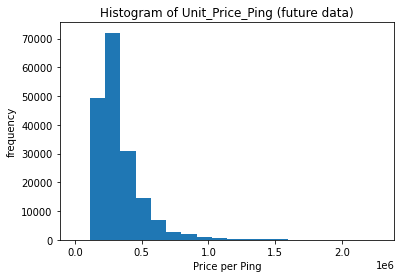

In [47]:
df_future_ = clean_and_drop(df_future)
plt.hist(df_future_['Unit_Price_Ping'], log=False, bins=20)
plt.title('Histogram of Unit_Price_Ping (future data)')
plt.xlabel('Price per Ping')
plt.ylabel('frequency')

(array([5.0000e+01, 4.9217e+04, 7.2055e+04, 3.0816e+04, 1.4565e+04,
        6.9280e+03, 2.5580e+03, 2.0290e+03, 1.0060e+03, 4.8000e+02,
        3.7900e+02, 2.2700e+02, 2.2600e+02, 2.0900e+02, 6.1000e+01,
        3.3000e+01, 1.0000e+01, 9.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([-1.87678621, -1.22471228, -0.57263835,  0.07943559,  0.73150952,
         1.38358345,  2.03565739,  2.68773132,  3.33980525,  3.99187918,
         4.64395312,  5.29602705,  5.94810098,  6.60017492,  7.25224885,
         7.90432278,  8.55639672,  9.20847065,  9.86054458, 10.51261852,
        11.16469245]),
 <BarContainer object of 20 artists>)

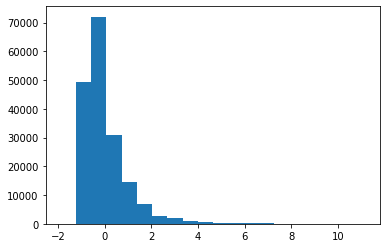

In [49]:
"""
Centering and scaling happen independently on each feature by computing
the relevant statistics on the samples in the training set. Mean and
standard deviation are then stored to be used on later data using
:meth:`transform`.

Standardization of a dataset is a common requirement for many
machine learning estimators: they might behave badly if the
individual features do not more or less look like standard normally
distributed data (e.g. Gaussian with 0 mean and unit variance).
"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = df_future_['Unit_Price_Ping'].array.reshape(-1, 1)
scaler.fit(data)
normalized_data = scaler.transform(data)
plt.hist(normalized_data, bins=20)

In [51]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data)
min_max_normalized_data = min_max_scaler.transform(data)

(array([5.0000e+01, 4.9217e+04, 7.2055e+04, 3.0816e+04, 1.4565e+04,
        6.9280e+03, 2.5580e+03, 2.0290e+03, 1.0060e+03, 4.8000e+02,
        3.7900e+02, 2.2700e+02, 2.2600e+02, 2.0900e+02, 6.1000e+01,
        3.3000e+01, 1.0000e+01, 9.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

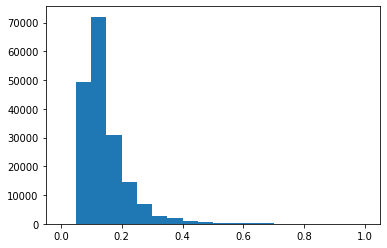

In [52]:
plt.hist(min_max_normalized_data, bins=20)

In [56]:
from sklearn.preprocessing import MaxAbsScaler

max_abs_scaler = MaxAbsScaler()
max_abs_scaler.fit(data)
max_abs_normalized_data = max_abs_scaler.transform(data)

(array([5.0000e+01, 4.9217e+04, 7.2055e+04, 3.0816e+04, 1.4565e+04,
        6.9280e+03, 2.5580e+03, 2.0290e+03, 1.0060e+03, 4.8000e+02,
        3.7900e+02, 2.2700e+02, 2.2600e+02, 2.0900e+02, 6.1000e+01,
        3.3000e+01, 1.0000e+01, 9.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([7.25330424e-06, 5.00068906e-02, 1.00006528e-01, 1.50006165e-01,
        2.00005803e-01, 2.50005440e-01, 3.00005077e-01, 3.50004715e-01,
        4.00004352e-01, 4.50003989e-01, 5.00003627e-01, 5.50003264e-01,
        6.00002901e-01, 6.50002539e-01, 7.00002176e-01, 7.50001813e-01,
        8.00001451e-01, 8.50001088e-01, 9.00000725e-01, 9.50000363e-01,
        1.00000000e+00]),
 <BarContainer object of 20 artists>)

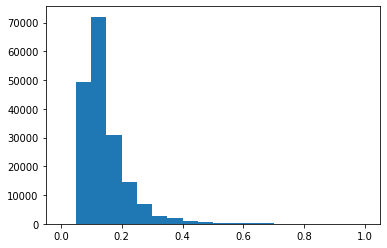

In [58]:
plt.hist(max_abs_normalized_data, bins=20)